In [ ]:
using Pkg, Revise
gen_la_pb_dir = "/home/jovyan/elementary-linear-algebra/GenLinAlgProblems"
Pkg.activate(gen_la_pb_dir)
using GenLinAlgProblems, LinearAlgebra, RowEchelon, Latexify, LaTeXStrings, SymPy, Random

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix");

In [2]:
α = symbols("alpha", real=true)
t = symbols("t",     real=true)
n = symbols("n",     integer=true)
;

<div style="float:center;width:100%;text-align: center;"><strong style="height:100px;color:darkred;font-size:40px;">Functions of a Matrix Examples</strong></div>

# 1. Functions of a Matrix

Consider the matrix $A =\left( \begin{array}{rrr}
-7 & -3 & 1 \\
-6 & -4 & 2 \\
-40 & -20 & 8 \\ \end{array} \right)$

## 1.1 Compute $\sin(A t)$ (6pt)

#### Eigendecomposition

In [15]:
A=[-7 -3 1; -6 -4 2; -40 -20 8]
d,intA  = factor_out_denominator(A)

l_show( L"\qquad A = ", A, L"\quad p(\lambda) = %$(charpoly(A))" )

L"$\qquad A = $$\begin{equation}
\left(
\begin{array}{rrr}
-7 & -3 & 1 \\
-6 & -4 & 2 \\
-40 & -20 & 8 \\
\end{array}
\right)
\end{equation}
$$\quad p(\lambda) = -λ^3 - 3*λ^2 - 2*λ$"

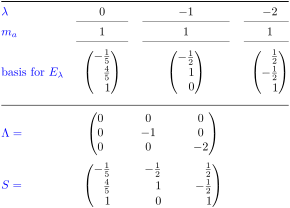

In [4]:
# Show all your intermediate results in a table.

nM.show_eig_tbl(intA,Ascale=d, fig_scale=1.2, mmLambda=11 )

In [16]:
S = [-2 -5 5; 8 10 -5; 10 0 10]//10
Λ = [ 0 0 0; 0 -1 0; 0 0 -2]
@show A*S == S*Λ;

A * S == S * Λ = true


<br>
$sin(At) = S \begin{pmatrix} 0 & 0 & 0 \\ 0 & -sin(t) & 0\\ 0 & 0 & -sin(2t) \end{pmatrix} S^{-1}$

The problem did not ask to multiply out the terms. Let's do so, however.

**Before blindly multiplying the terms,** some thinking is in order:<br>
* if we simply multiply the matrices, we immediately have sin() terms to deal with
* alternatively, we could expand $A = S \Lambda S^{-1}$ and use the expanded form<br> $\qquad f(A) = f(\lambda_1)\ u_1 v_1^t + f(\lambda_2)\ u_2 v_2^t + f(\lambda_3)\ u_3 v_3^t$,<br><br>
where $u_i$ are the columns of $S$ and $v_i^t$ are the rows of $S^{-1}$

In [18]:
S_inv = inv(S)
display(l_show(L"S = \begin{pmatrix} u_1 & u_2 & u_3 \end{pmatrix} =", S,  L"\;\;\; S^{-1} = \begin{pmatrix} v_1^t\\ v_2^t \\ v_3^t\end{pmatrix} = ", S_inv))
println()
u₁ = S[:,1]
u₂ = S[:,2]
u₃ = S[:,3]
v₁ = S_inv[1,:]
v₂ = S_inv[2,:]
v₃ = S_inv[2,:]
uv_1 = u₁*v₁'
uv_2 = u₂*v₂'
uv_3 = u₃*v₃'
l_show( L"u_1 v_1^t = ", uv_1,  L",\;\; u_2 v_2^t = ", uv_2,  L",\;\; u_3 v_3^t = ", uv_3)

L"$S = \begin{pmatrix} u_1 & u_2 & u_3 \end{pmatrix} =$$\begin{equation}
\left(
\begin{array}{rrr}
\frac{-1}{5} & \frac{-1}{2} & \frac{1}{2} \\
\frac{4}{5} & 1 & \frac{-1}{2} \\
1 & 0 & 1 \\
\end{array}
\right)
\end{equation}
$$\;\;\; S^{-1} = \begin{pmatrix} v_1^t\\ v_2^t \\ v_3^t\end{pmatrix} = $$\begin{equation}
\left(
\begin{array}{rrr}
-20 & -10 & 5 \\
26 & 14 & -6 \\
20 & 10 & -4 \\
\end{array}
\right)
\end{equation}
$"

L"$u_1 v_1^t = $$\begin{equation}
\left(
\begin{array}{rrr}
4 & 2 & -1 \\
-16 & -8 & 4 \\
-20 & -10 & 5 \\
\end{array}
\right)
\end{equation}
$$,\;\; u_2 v_2^t = $$\begin{equation}
\left(
\begin{array}{rrr}
-13 & -7 & 3 \\
26 & 14 & -6 \\
0 & 0 & 0 \\
\end{array}
\right)
\end{equation}
$$,\;\; u_3 v_3^t = $$\begin{equation}
\left(
\begin{array}{rrr}
13 & 7 & -3 \\
-13 & -7 & 3 \\
26 & 14 & -6 \\
\end{array}
\right)
\end{equation}
$"

In [7]:
l_show( "Multiplying out the terms, we get ", L"\;\;sin(A t) = ", sympy.sin( 0*t ) * uv_1 -sympy.sin(t) * uv_2 - sympy.sin(2*t) * uv_3 )

"\$\\text{Multiplying out the terms, we get }\$\$\\;\\;sin(A t) = \$\$\\begin{equation}\n\\left(\n\\begin{array}{rrr}\n13 \\cdot \\sin\\left( t \\right) - 13 \\cdot \\sin\\left( 2 \\cdot t \\right) & 7 \\cdot \\sin\\left( t \\right) - 7 \\cdot \\sin\\left( 2 \\cdot t \\right) & -3 \\cdot \\sin\\left( t \\ri" ⋯ 151 bytes ⋯ "+ 7 \\cdot \\sin\\left( 2 \\cdot t \\right) & 6 \\cdot \\sin\\left( t \\right) - 3 \\cdot \\sin\\left( 2 \\cdot t \\right) \\\\\n-26 \\cdot \\sin\\left( 2 \\cdot t \\right) & -14 \\cdot \\sin\\left( 2 \\cdot t \\right) & 6 \\cdot \\sin\\left( 2 \\cdot t \\right) \\\\\n\\end{array}\n\\right)\n\\end{equation}\n\$"

**Note:** Once we computed the $u_i v_i^t$ terms, assembling the final matrix is trivial

## 1.2 Compute $e^{A t}$ and multipy out all matrices. (2pts)

In [8]:
# reuse the same matrices as before, we assemble the exp(At) matrix
l_show( "In the same way, we get ", L"\;\;e^{A t} = ", sympy.exp( 0*t ) * uv_1 + sympy.exp(-t) * uv_2 + sympy.exp(-2*t) * uv_3 )

L"$\text{In the same way, we get }$$\;\;e^{A t} = $$\begin{equation}
\left(
\begin{array}{rrr}
4 - 13 \cdot e^{ - t} + 13 \cdot e^{-2 \cdot t} & 2 - 7 \cdot e^{ - t} + 7 \cdot e^{-2 \cdot t} & -1 + 3 \cdot e^{ - t} - 3 \cdot e^{-2 \cdot t} \\
-16 + 26 \cdot e^{ - t} - 13 \cdot e^{-2 \cdot t} & -8 + 14 \cdot e^{ - t} - 7 \cdot e^{-2 \cdot t} & 4 - 6 \cdot e^{ - t} + 3 \cdot e^{-2 \cdot t} \\
-20 + 26 \cdot e^{-2 \cdot t} & -10 + 14 \cdot e^{-2 \cdot t} & 5 - 6 \cdot e^{-2 \cdot t} \\
\end{array}
\right)
\end{equation}
$"

## 1.3 What is $\lim_{t\rightarrow \infty}{e^{A t}}$ (2pts)

We could of course compute the limits of each of the entries in our previous result, but is is easier<br>
$\qquad$ to use $\;\;\lim_{t\rightarrow \infty} f(A) = \lim_{t\rightarrow \infty} f(\lambda_1) u_1 v_1^t + \lim_{t\rightarrow \infty} f(\lambda_2) u_2 v_2^t + \lim_{t\rightarrow \infty} f(\lambda_3) u_3 v_3^t$.

Since $\;\;lim_{t\rightarrow \infty} e^{0t} = 1,\;\; \lim_{t\rightarrow \infty} e^{-t} = 0,\;\; \lim_{t\rightarrow \infty} e^{-2t} = 0,$<br>
$\qquad$ we have $\;\;\lim_{t\rightarrow \infty} e^{A t} = u_1 v_1^t$.

In [9]:
l_show( L"\lim_{t\rightarrow \infty} e^{A t} = ", uv_1)

L"$\lim_{t\rightarrow \infty} e^{A t} = $$\begin{equation}
\left(
\begin{array}{rrr}
4 & 2 & -1 \\
-16 & -8 & 4 \\
-20 & -10 & 5 \\
\end{array}
\right)
\end{equation}
$"

# 2. Difference Equation

Consider the matrix $B = \frac{1}{10} A,\;$ where $A$ is the matrix of the previous question.

## 2.1 How are the eigendecompositions of $A$ and $B$ related? Justify your answer (2pts)

* Eigenvalues $p(\mu) = \left|B-\mu I \right|$ <br>
Let $\mu$ be the eigenvalues of $B$, and $\lambda$ be the eigenvalues of $A$.<br>
<br>
$\qquad \begin{align}
p(\mu) &= \left|B-\mu I \right| \\
&= \left|\frac{1}{10} A -\mu I \right| \\
&= \frac{1}{10^3} \left| A - 10 \mu I \right| \\
\end{align}$<br>
<br>
Therefore, $\mu = \frac{1}{10} \lambda$, i.e., $\mathbf{B}$
<strong>has the same eigenvalues as $A$ scaled by</strong> $\mathbf{\frac{1}{10}}$<br><br>

* Eigenvectors $\mathscr{N}(B - \mu I)$<br>
$\qquad B x = \mu x \;\; \Leftrightarrow \;\; \frac{1}{10} A x = \frac{1}{10} \lambda x \;\; \Leftrightarrow \;\; A x = \lambda x$<br>
<br>
Therefore <strong>the eigenvectors stay the same.</strong>

Eigendecomposition for B


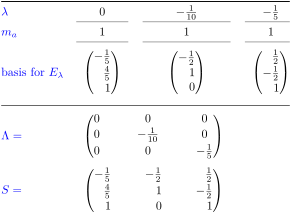

In [10]:
println("Eigendecomposition for B")
nM.show_eig_tbl(intA, Ascale=10*d, fig_scale=1.2, mmLambda=11 )

## 2.1 Solution of a Difference Equation (6pts)

Solve the difference equation $\;\; y_n = B\ y_{n-1},\;\; n = 1, 2, \dots$<br>
with initial condition
$y_0 = \begin{pmatrix} a & b & c \end{pmatrix}^t$ for some constants $a, b$ and
$c$.

Multiply out all matrices.

We know that the solution of the difference equation is $y_n = B^n\ y_0,\;\; n=0,1,2,\dots$

We can reuse the computations from problem 1:

$\qquad B^n = = \mu_1^n\ u_1 v_1^t + \mu_2^n\ u_2 v_2^t + \mu_3^n\ u_3 v_3^t$
$

In [13]:
l_show( L"B^n =", ( - 1//10)^n * uv_2 + (- 1//5 )^n * uv_3 )

"\$B^n =\$\$\\begin{equation}\n\\left(\n\\begin{array}{rrr}\n-13 \\cdot \\left( \\frac{-1}{10} \\right)^{n} + 13 \\cdot \\left( \\frac{-1}{5} \\right)^{n} & -7 \\cdot \\left( \\frac{-1}{10} \\right)^{n} + 7 \\cdot \\left( \\frac{-1}{5} \\right)^{n} & 3 \\cdot \\left( \\frac{-1}{10} \\right)^{n} - 3 \\" ⋯ 196 bytes ⋯ "5} \\right)^{n} & -6 \\cdot \\left( \\frac{-1}{10} \\right)^{n} + 3 \\cdot \\left( \\frac{-1}{5} \\right)^{n} \\\\\n26 \\cdot \\left( \\frac{-1}{5} \\right)^{n} & 14 \\cdot \\left( \\frac{-1}{5} \\right)^{n} & -6 \\cdot \\left( \\frac{-1}{5} \\right)^{n} \\\\\n\\end{array}\n\\right)\n\\end{equation}\n\$"

which again is trivial to assemble from the matrices $u_i v_i^t$ obtained in problem 1

## 2.2 What is $\lim_{n\rightarrow \infty}{y_n}$ (2pts)

As before, we could compute the limits of each of the entries in our previous result, but is is easier to use 

 $\qquad lim_{n\rightarrow \infty} B^n = \lim_{t\rightarrow \infty}\ \mu_1^n\ u_1 v_1^t + \lim_{n\rightarrow \infty}\ \mu_2^n\ u_2 v_2^t + \lim_{n\rightarrow \infty}\ \mu_3^n\ u_3 v_3^t$.

Since $\;\;\lim_{n\rightarrow \infty} 0^n = 0,\;\;
           \lim_{n\rightarrow \infty} \left(-\frac{1}{10} \right)^n = 0,\;\;
           \lim_{n\rightarrow \infty} \left(-\frac{1}{5} \right)^n = 0,
           $<br><br>
$\qquad$ we have $\;\;\lim_{n\rightarrow \infty} B^n = 0$.

No further calculations required.